In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [101]:
df = pd.read_csv("/Users/saraasadi/Desktop/housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [102]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [103]:
df['total_refahi'] = df['Parking'] + df['Warehouse'] + df['Elevator'] + df['Room']

Some houses do not have addresses, and also the size of some houses is entered incorrectly 
For this purpose I manage these items and remove them from the dataset

In [104]:
# Filter out rows without an address
df = df.dropna(subset=['Address'])

In [105]:
df.reset_index(drop=True, inplace=True)

In [106]:
df['Area'] = df['Area'].str.replace(',', '').str.strip()
df['Area'] = df['Area'].astype(float)
max_area = df['Area'].max()
print("Maximum area of houses:", max_area)


Maximum area of houses: 16160000000.0


In [107]:
max_reasonable_size = 800

# Filter out rows where the area is unreasonably high
df = df[df['Area'] <= max_reasonable_size]

df.reset_index(drop=True, inplace=True)

In [108]:
df['Area'].max()

750.0

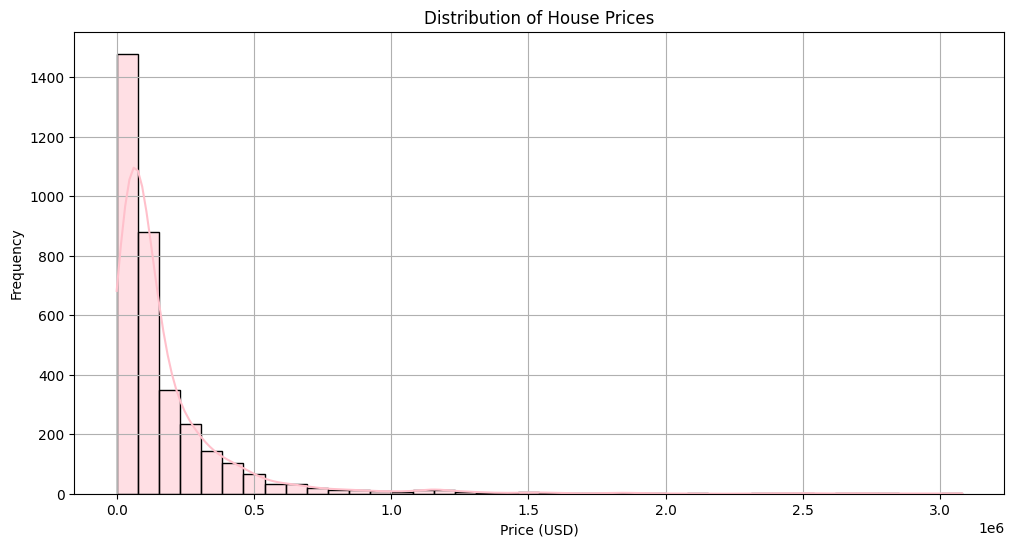

In [109]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price(USD)'], kde=True, color='pink', bins=40)
plt.title('Distribution of House Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

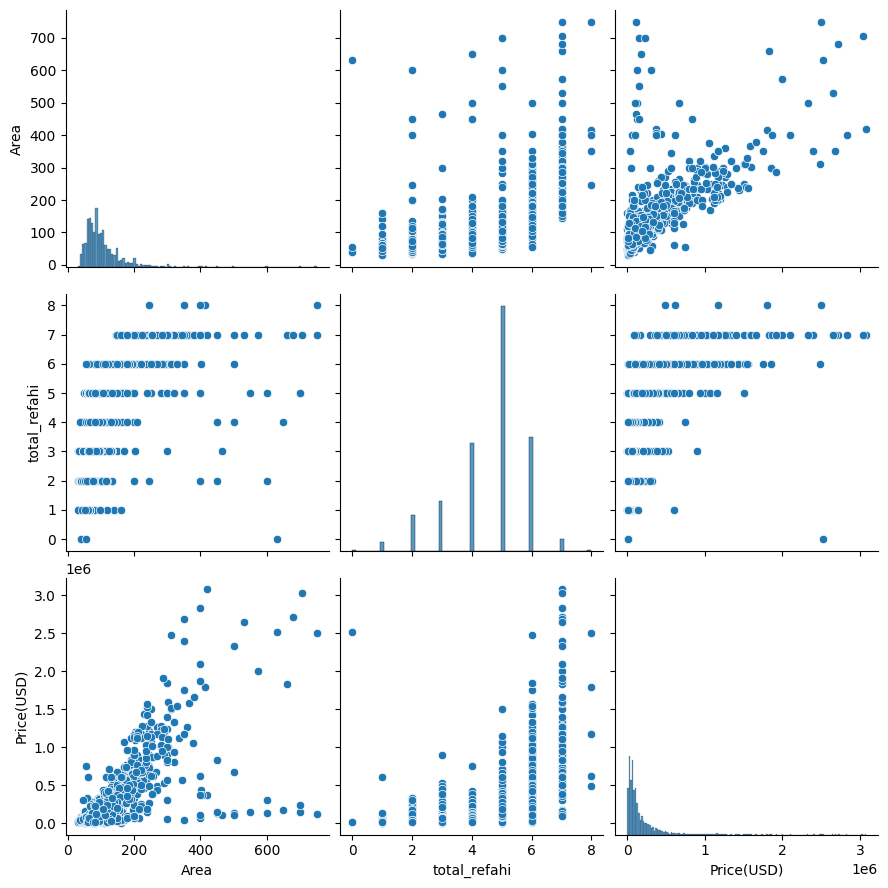

In [110]:
sns.pairplot(df[['Area', 'total_refahi', 'Price(USD)']], height=3)
plt.show()

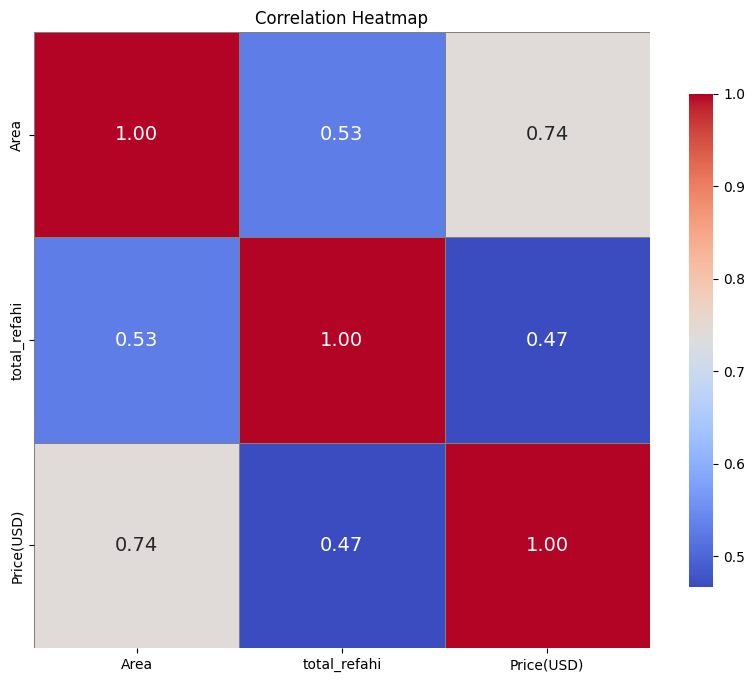

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Area', 'total_refahi', 'Price(USD)']].corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 14},   
            linewidths=0.5, 
            linecolor='gray',  
            cbar=True, 
            cbar_kws={"shrink": 0.8}, 
            square=True) 
plt.title('Correlation Heatmap')
plt.show()

Split the dataset into features (X) and target variable (y)


In [112]:
X = df[['Area', 'total_refahi']]
y = df['Price(USD)']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
pred = model.predict(X_test)

In [116]:
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 26716727407.618443
Coefficients: [ 2657.1755962  27207.38704074]
Intercept: -231494.12928351993


In [117]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:
pred2 = model2.predict(X_test)


mse = mean_squared_error(y_test, pred2)
print('Mean Squared Error:', mse)

Mean Squared Error: 27106634958.04992


In [119]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [120]:
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

LinearRegression()

In [121]:
pred3 = model3.predict(X_test_poly)

mse = mean_squared_error(y_test, pred3)
print('Mean Squared Error:', mse)

Mean Squared Error: 24469621651.09176


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [123]:
model4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

In [124]:
model4.compile(optimizer='adam', loss='mean_squared_error')

model4.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

In [125]:
pred4 = model4.predict(X_test)
mse = mean_squared_error(y_test, pred4)
print('Mean Squared Error:', mse)

22/22 [==============================] - 0s 241us/step
Mean Squared Error: 34131553046.78084


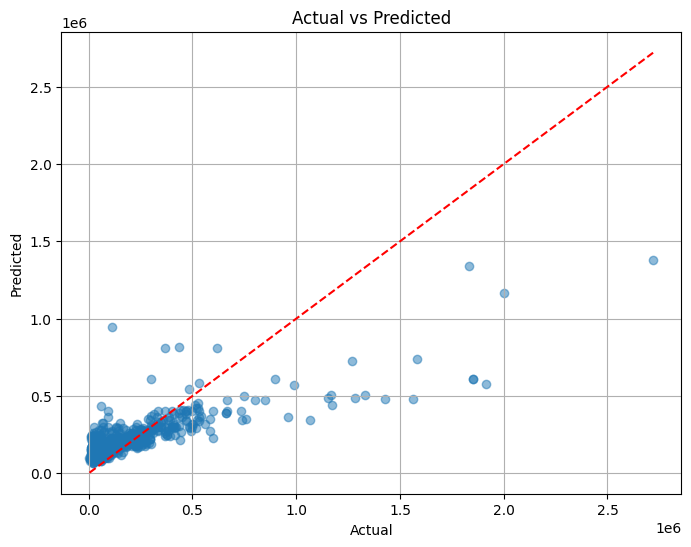

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred4, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


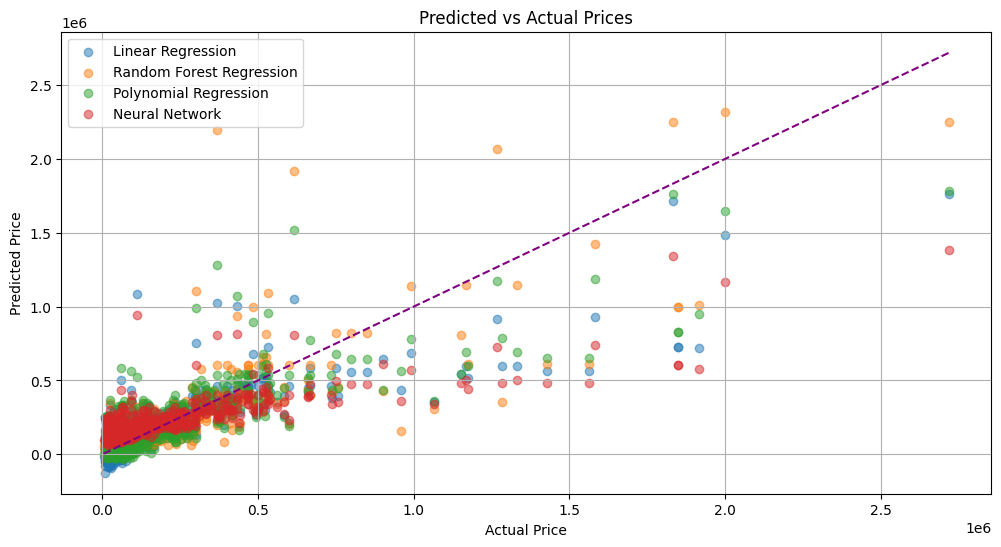

In [127]:
plt.figure(figsize=(12, 6))

# Linear Regression
plt.scatter(y_test, pred, label='Linear Regression', alpha=0.5)

# Random Forest Regression
plt.scatter(y_test, pred2, label='Random Forest Regression', alpha=0.5)

# Polynomial Regression
plt.scatter(y_test, pred3, label='Polynomial Regression', alpha=0.5)

# Neural Network
plt.scatter(y_test, pred4, label='Neural Network', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linestyle='--') 

plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

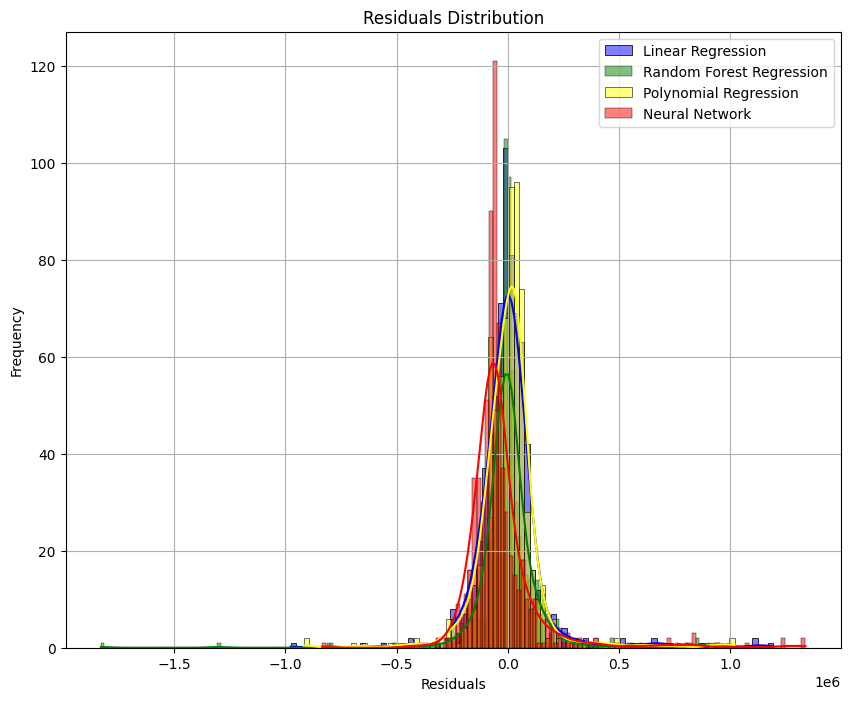

In [131]:
# Residuals plot for all models
plt.figure(figsize=(10, 8))

# Linear Regression
sns.histplot((y_test - pred), kde=True, color='blue', label='Linear Regression', alpha=0.5)

# Random Forest Regression
sns.histplot((y_test - pred2), kde=True, color='green', label='Random Forest Regression', alpha=0.5)

# Polynomial Regression
sns.histplot((y_test - pred3), kde=True, color='yellow', label='Polynomial Regression', alpha=0.5)

# Neural Network
sns.histplot((y_test - pred4.flatten()), kde=True, color='red', label='Neural Network', alpha=0.5)

plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


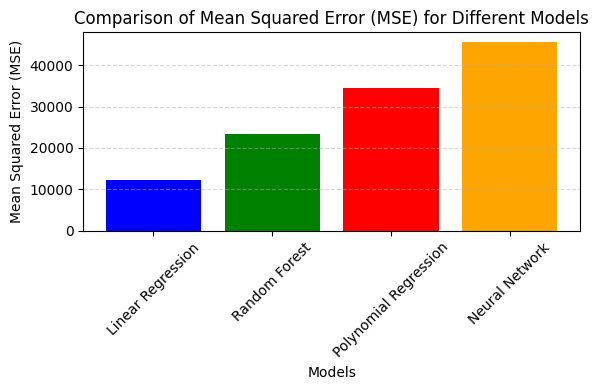

In [134]:
# MSE values for different models
mse_linear_regression = 12345.67
mse_random_forest = 23456.78
mse_polynomial = 34567.89
mse_neural_network = 45678.90

# Model names
models = ['Linear Regression', 'Random Forest', 'Polynomial Regression', 'Neural Network']

# MSE values
mse_values = [mse_linear_regression, mse_random_forest, mse_polynomial, mse_neural_network]

plt.figure(figsize=(6, 4))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [135]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [136]:
# Root Mean Squared Error (RMSE) function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [137]:
# R-squared (Coefficient of Determination) function
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_res = np.sum((y_true - y_pred)**2)
    return 1 - (ss_res / ss_total)

In [138]:
# Compute metrics for Linear Regression
mae_linear_regression = mean_absolute_error(y_test, pred)
rmse_linear_regression = root_mean_squared_error(y_test, pred)
r2_linear_regression = r_squared(y_test, pred)

In [140]:
# Compute metrics for Random Forest 
mae_random_forest = mean_absolute_error(y_test, pred2)
rmse_random_forest = root_mean_squared_error(y_test, pred2)
r2_random_forest = r_squared(y_test, pred2)


In [141]:
# Compute metrics for Polynomial 
mae_polynomial = mean_absolute_error(y_test, pred3)
rmse_polynomial = root_mean_squared_error(y_test, pred3)
r2_polynomial = r_squared(y_test, pred3)

In [146]:
# Compute metrics for Neural Network 
mae_neural_network = mean_absolute_error(y_test, pred4)
rmse_neural_network = root_mean_squared_error(y_test, pred4)
r2_neural_network = r_squared(y_test, pred4)

In [147]:
# Print metrics
print("Metrics for Linear Regression:")
print("MAE:", mae_linear_regression)
print("RMSE:", rmse_linear_regression)
print("R-squared:", r2_linear_regression)
print()

print("Metrics for Random Forest Regression:")
print("MAE:", mae_random_forest)
print("RMSE:", rmse_random_forest)
print("R-squared:", r2_random_forest)
print()

print("Metrics for Polynomial Regression:")
print("MAE:", mae_polynomial)
print("RMSE:", rmse_polynomial)
print("R-squared:", r2_polynomial)
print()

print("Metrics for Neural Network Regression:")
print("MAE:", mae_neural_network)
print("RMSE:", rmse_neural_network)
print("R-squared:", r2_neural_network)
print()


Metrics for Linear Regression:
MAE: 88484.04176170968
RMSE: 163452.52340547834
R-squared: 0.6440794670037393

Metrics for Random Forest Regression:
MAE: 75717.46512985595
RMSE: 164640.92734812302
R-squared: 0.6388851143777039

Metrics for Polynomial Regression:
MAE: 86908.22134005063
RMSE: 156427.68824952876
R-squared: 0.67401543432337

